In [4]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : Symmetric Convolution


(45, 45)


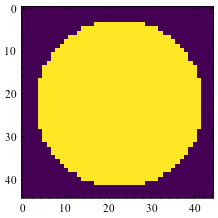

In [5]:
#var = 2/(128*9)

N = 45
img =  tf.expand_dims(cv2.imread('input4.png', 0)/255. , axis=-1)
H, W, C = img.shape  # Get image dimensions
offset_height = (H - N) // 2
offset_width = (W - N) // 2
img = tf.image.crop_to_bounding_box(img, offset_height, offset_width, N, N)[...,0]
plt.imshow(img)
#img = (img-np.mean(img))/np.std(img)
#img = tf.repeat(tf.expand_dims([img], axis=-1) , repeats = 512, axis=-1)  #get_double_slit(shape) , axis=0)
print(img.shape)

In [6]:
w = np.zeros((3,3,1,1))


t1 = np.zeros((3,3))
t2 = np.zeros((3,3))

t1[1, 2] = 1.
t2[2, 1] = 1.

w1 = fft.idctn(t1, norm='ortho')
w1 /= np.sum(np.abs(w1))

w2 = fft.idctn(t2, norm='ortho')
w2 /= np.sum(np.abs(w2))

w[:,:,0,0] = (np.cos(-np.pi))*w1 + ( np.sin(-np.pi))*w2
w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w[:,:,0,0]) )

tf.math.reduce_euclidean_norm(w[:,:,0,0])

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

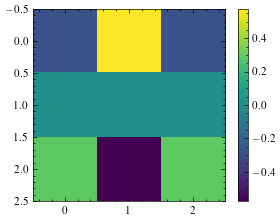

In [7]:
fig, ax = plt.subplots()

im = plt.imshow(w[..., 0,0])
fig.colorbar(im, orientation='vertical');

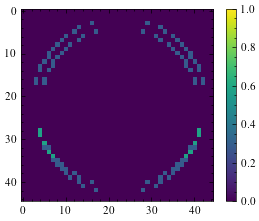

In [28]:
x = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = w.shape[-2], axis=-1), dtype=tf.float32) 


x = tf.nn.relu( tf.nn.conv2d(x, w , strides=(1,1), 
							 padding='SAME') )
fig, ax = plt.subplots()
c = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)

im = plt.imshow(x[0,:,:,0], norm = c)
fig.colorbar(im, orientation='vertical');






#ax.set(xlim=(0, 45), ylim=(0, 45));



0
(1, 45, 45, 1)
0.8107145
1
(1, 45, 45, 1)
0.8098537
2
(1, 45, 45, 1)
0.8072799
3
(1, 45, 45, 1)
0.80301815
4
(1, 45, 45, 1)
0.79711056
5
(1, 45, 45, 1)
0.78961664
6
(1, 45, 45, 1)
0.78061324
7
(1, 45, 45, 1)
0.77019525
8
(1, 45, 45, 1)
0.7584755
9
(1, 45, 45, 1)
0.74558604
10
(1, 45, 45, 1)
0.7316783
11
(1, 45, 45, 1)
0.71692353
12
(1, 45, 45, 1)
0.7015134
13
(1, 45, 45, 1)
0.6856418
14
(1, 45, 45, 1)
0.66946936
15
(1, 45, 45, 1)
0.65323657
16
(1, 45, 45, 1)
0.6372102
17
(1, 45, 45, 1)
0.62167364
18
(1, 45, 45, 1)
0.6069103
19
(1, 45, 45, 1)
0.5931558
20


c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(1, 45, 45, 1)
0.58071333
21
(1, 45, 45, 1)
0.57004523
22
(1, 45, 45, 1)
0.5614761
23
(1, 45, 45, 1)
0.55515146
24
(1, 45, 45, 1)
0.55122536
25
(1, 45, 45, 1)
0.54981524
26
(1, 45, 45, 1)
0.5510171
27
(1, 45, 45, 1)
0.55481666
28
(1, 45, 45, 1)
0.5610999
29
(1, 45, 45, 1)
0.5696088
30
(1, 45, 45, 1)
0.5800712
31
(1, 45, 45, 1)
0.59236807
32
(1, 45, 45, 1)
0.60627127
33
(1, 45, 45, 1)
0.6214186
34
(1, 45, 45, 1)
0.63743997
35
(1, 45, 45, 1)
0.6540229
36
(1, 45, 45, 1)
0.67086905
37
(1, 45, 45, 1)
0.687698
38
(1, 45, 45, 1)
0.7042146
39
(1, 45, 45, 1)
0.72012866
40
(1, 45, 45, 1)
0.73523057
41
(1, 45, 45, 1)
0.74933356
42
(1, 45, 45, 1)
0.7622721
43
(1, 45, 45, 1)
0.7739012
44
(1, 45, 45, 1)
0.7840959
45
(1, 45, 45, 1)
0.7927504
46
(1, 45, 45, 1)
0.7997774
47
(1, 45, 45, 1)
0.80510765
48
(1, 45, 45, 1)
0.80868965
49
(1, 45, 45, 1)
0.81048924
50
(1, 45, 45, 1)
0.81048924
51
(1, 45, 45, 1)
0.8086898
52
(1, 45, 45, 1)
0.80510765
53
(1, 45, 45, 1)
0.79977745
54
(1, 45, 45, 1)
0.7927504
55
(1

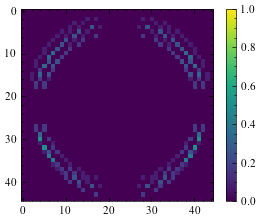

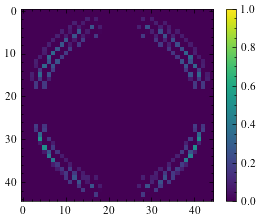

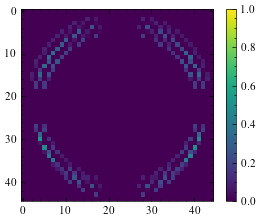

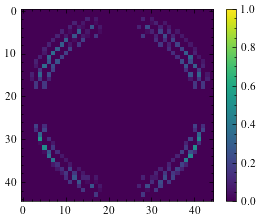

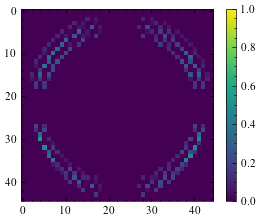

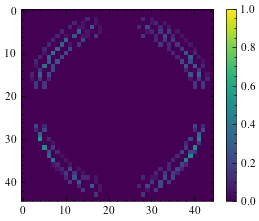

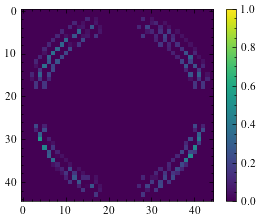

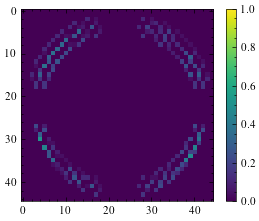

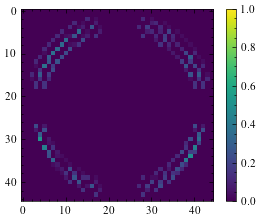

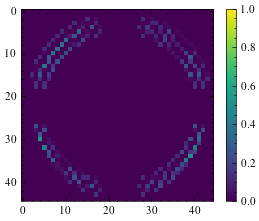

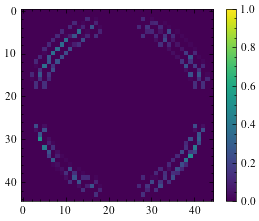

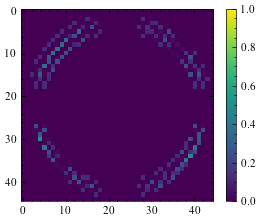

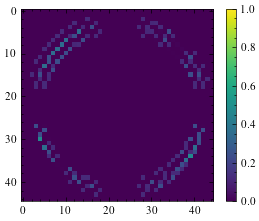

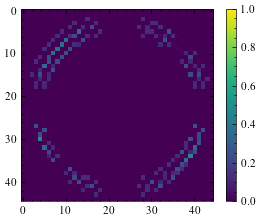

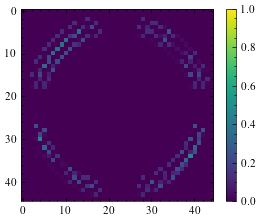

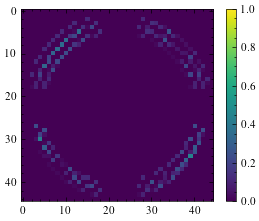

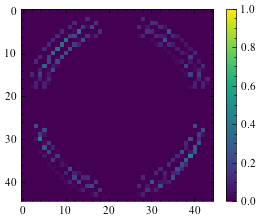

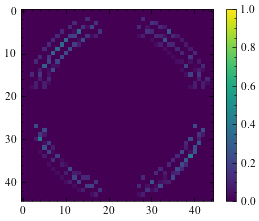

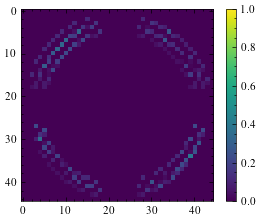

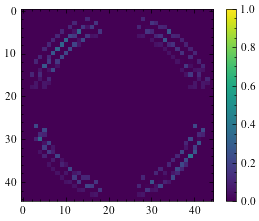

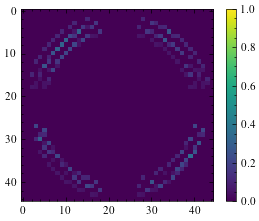

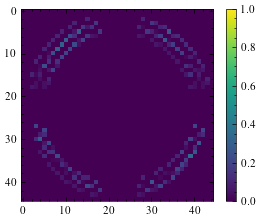

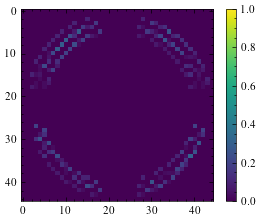

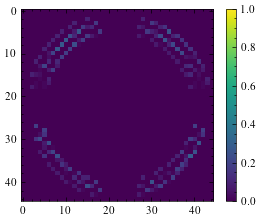

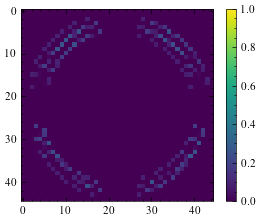

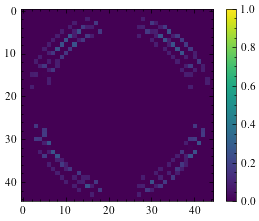

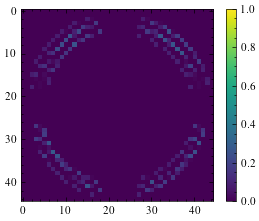

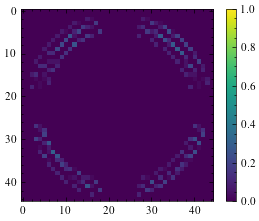

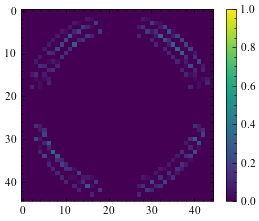

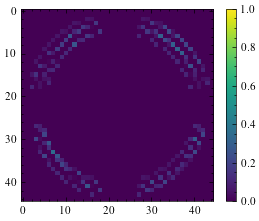

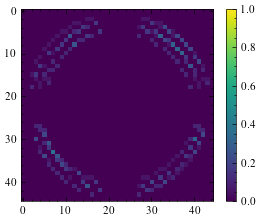

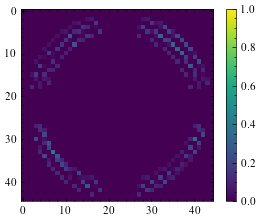

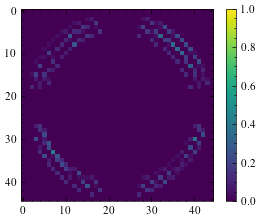

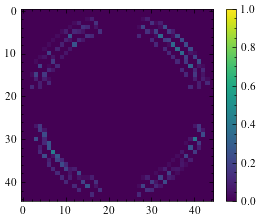

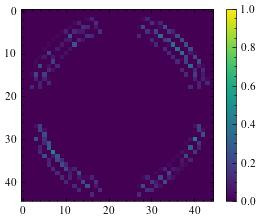

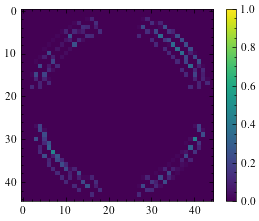

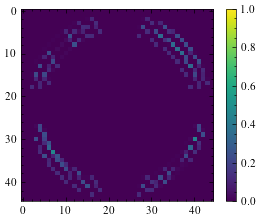

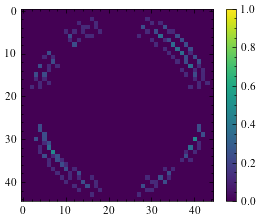

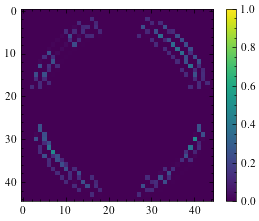

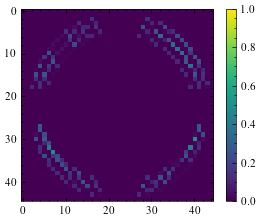

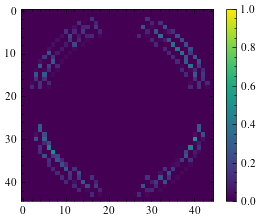

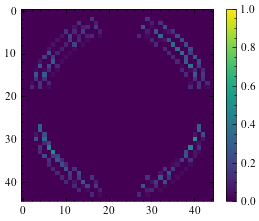

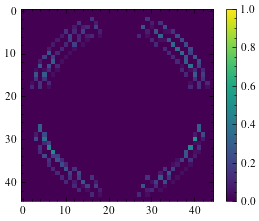

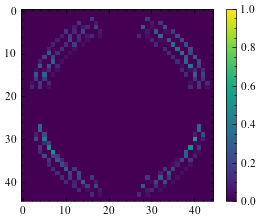

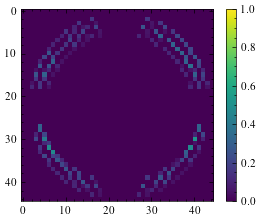

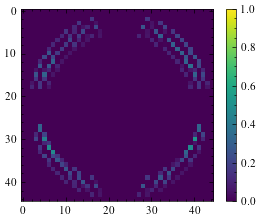

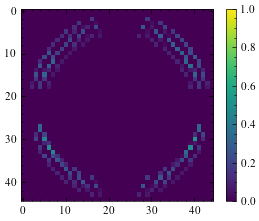

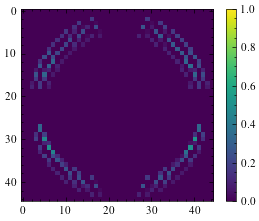

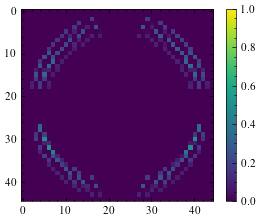

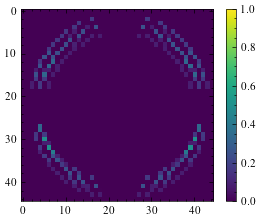

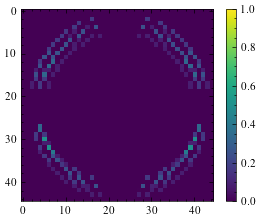

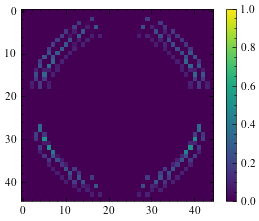

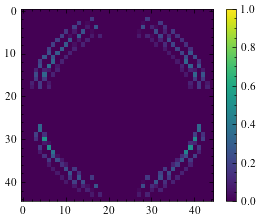

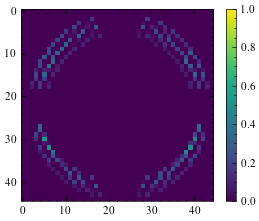

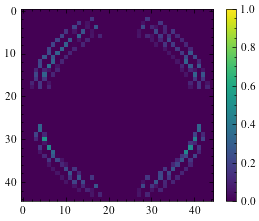

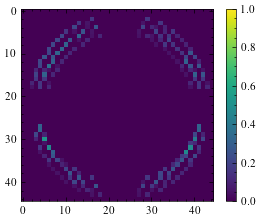

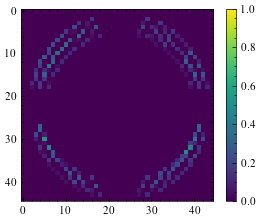

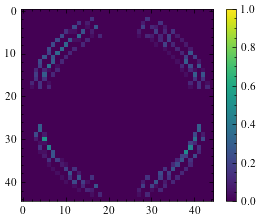

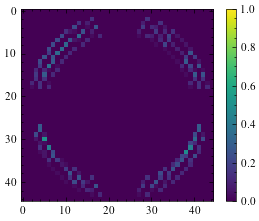

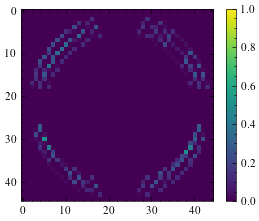

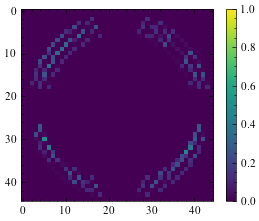

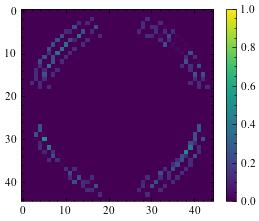

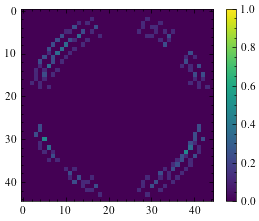

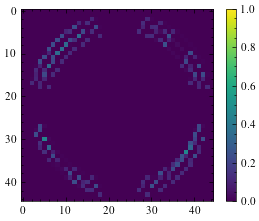

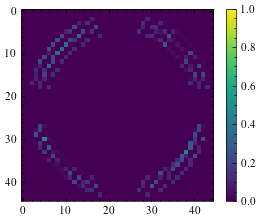

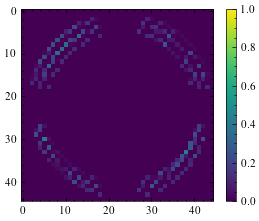

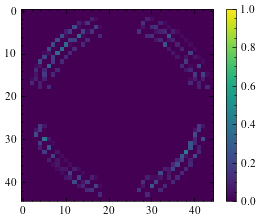

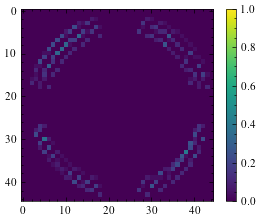

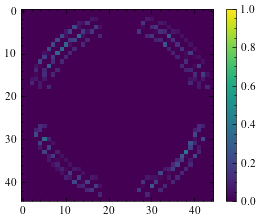

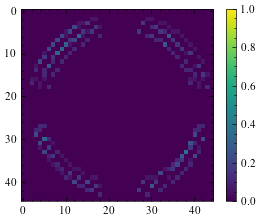

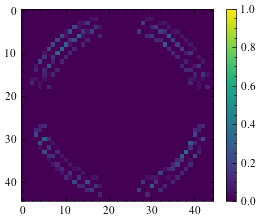

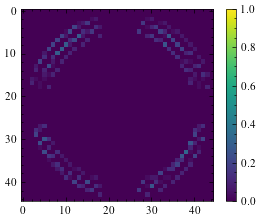

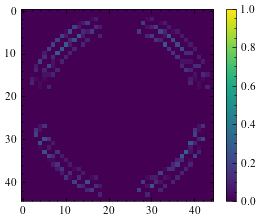

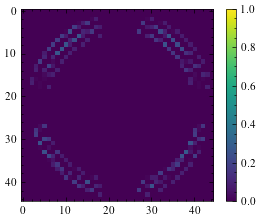

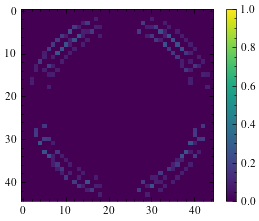

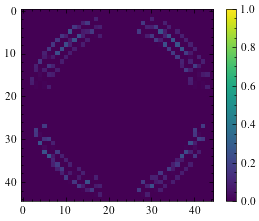

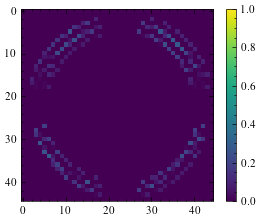

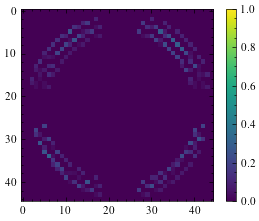

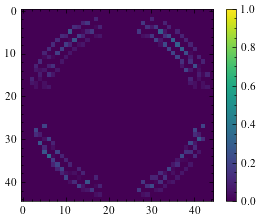

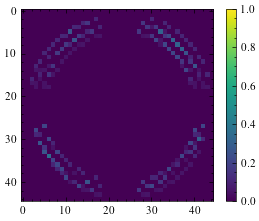

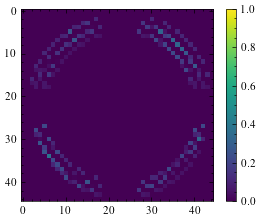

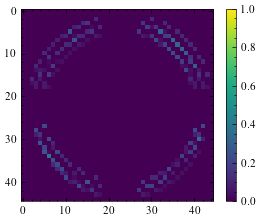

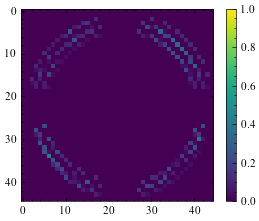

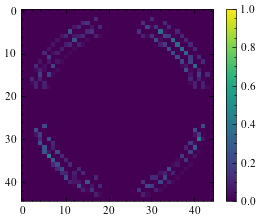

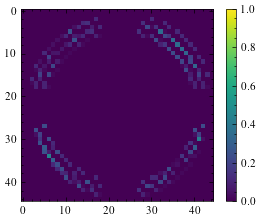

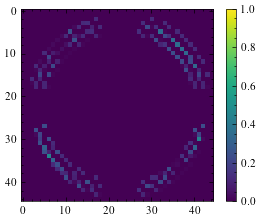

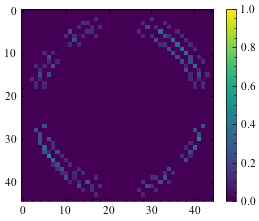

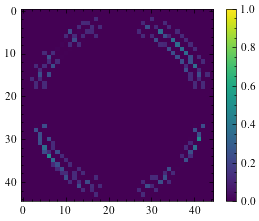

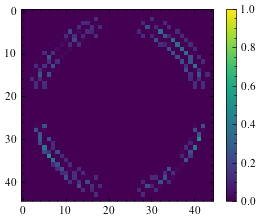

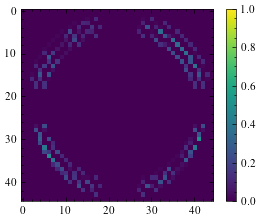

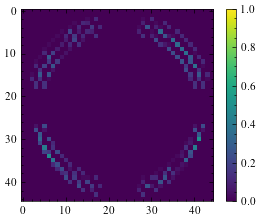

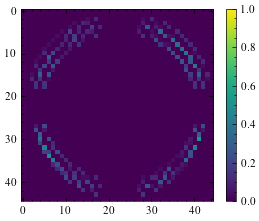

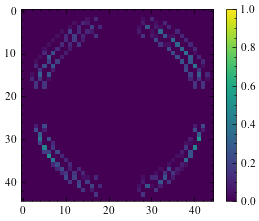

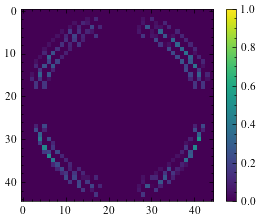

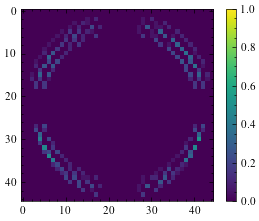

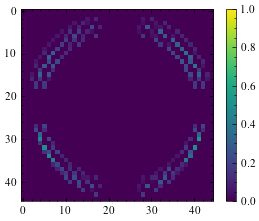

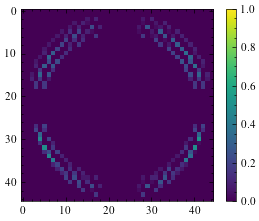

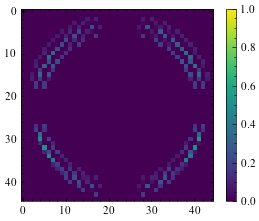

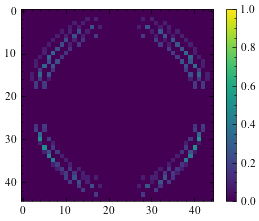

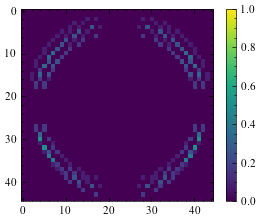

In [29]:
import matplotlib.patches as mpatches


w = np.zeros((3,3,1,1))


t1 = np.zeros((3,3))
t2 = np.zeros((3,3))

t1[1, 2] = 1.
t2[2, 1] = 1.

w1 = fft.idctn(t1, norm='ortho')
w1 /= np.sum(np.abs(w1))

w2 = fft.idctn(t2, norm='ortho')
w2 /= np.sum(np.abs(w2))

w[:,:,0,0] = (np.cos(-np.pi))*w1 + ( np.sin(-np.pi))*w2
w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w[:,:,0,0]))



x = img




directory = f"figures/malus_high_order"
if not os.path.exists(directory):
	os.makedirs(directory)


response_mag = []
init_mag = tf.math.reduce_euclidean_norm(x).numpy()

x = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = w.shape[-2], axis=-1), dtype=tf.float32) 


x = tf.nn.relu( tf.nn.conv2d(x, w , strides=(1,1), 
							 padding='SAME') )

init_mag = tf.math.reduce_euclidean_norm(x).numpy()

angles = np.linspace(-np.pi, np.pi, 100)
for i in range(100):
	print(i)
	fig, ax = plt.subplots()
	print(x.shape)
	
	
	w[:,:,0,0] = (np.cos(angles[i]))*w1 + ( np.sin(angles[i]))*w2
	w[:,:,0,0] = w[:,:,0,0] / (tf.math.reduce_euclidean_norm(w[:,:,0,0]))

		
	x_out = tf.nn.relu( tf.nn.conv2d(x, w , strides=(1,1), 
								padding='SAME') )

	response_mag.append(tf.math.reduce_euclidean_norm(x_out).numpy()/init_mag)
	print(response_mag[-1])
	c = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
	im = ax.imshow(np.sum(x_out[0,:,:,:], axis=-1), norm = c);
	#ax.plot(45//2, 45, marker = '+', color='red');



	#ax.set(xlim=(0, 45), ylim=(0, 45));

	fig.colorbar(im, orientation='vertical');
	fig.savefig(directory + f'/{i}.pdf', dpi=600,  transparent=True, bbox_inches='tight')




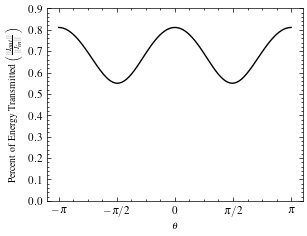

In [10]:
fig, ax= plt.subplots(1,1)

ax.plot(angles,response_mag)

ticks = np.arange(-np.pi, 1.5*np.pi, np.pi/2)
labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
# Set ticks and labels on the x-axis
ax.set_xticks(ticks=ticks, labels=labels);
ax.set_yticks(ticks=np.arange(0,1, 0.1));

ax.set_ylabel(r"Percent of Energy Transmitted $\left( \frac{||I_{out}||}{||I_{in}||} \right)$", fontsize=7)
ax.set_xlabel(r"$\theta$", fontsize=7)

plt.savefig('figures/malus_high_order.pdf', dpi=600)
plt.show()
